In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
from GGA import GGA
import helpers
from joblib import Parallel, delayed,parallel_backend
from ocat import OCAT

# Preprocessing

In [2]:
if not os.path.isfile("data/data.npy"):
    dirName = "data/images"
    images = []
    paths = []
    for file in os.listdir(dirName):
        if (".png" in file):
            paths.append([int(file.split("_")[1].replace(".png","")),f'{dirName}/{file}'])
    paths = sorted(paths,key=lambda x:x[0])
    for path in paths:
        img = cv2.imread(path[1],cv2.IMREAD_GRAYSCALE)
        images.append(img)
    np.save("data/data.npy",images)
else:
    print("data.npy already exist")

data.npy already exist


In [3]:
def getProblemSub2(data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue):
    index = tuple([iState]+cell)
    cls = data[index]
    #start = time.time()
    neighbors = helpers.getNeighbors(cell,neighborhood,stateSize)
    #print("neighbors time {}".format(time.time()-start))
    values = helpers.getNeighborsValue(currentState,neighbors,paddingType,paddingValue)
    #print("neighbors value time {}".format(time.time()-start))
    values = [values[key] for key in values]
    values.append(cls)
    #print("neighbors value 2 time {}".format(time.time()-start))
    return values
    
def getProblemSub1(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue):
    print(iState)
    currentState = data[iState-1].reshape(-1)
    backend = 'threading'
    with parallel_backend(backend):
        vlscls = Parallel(n_jobs=4)(delayed(getProblemSub2) (data,iState,cell,stateSize,currentState,neighborhood,paddingType,paddingValue) for cell in helpers.multiDimensionalGenerator(stateSize))
    return vlscls

def getProblem(data,neighborhood,paddingType,paddingValue):
    problem = []
    dataSize = np.shape(data)
    stateSize = dataSize[1:]
    noStates = dataSize[0]
    backend = 'threading'
    with parallel_backend(backend):
        problem = Parallel(n_jobs=4)(delayed(getProblemSub1)(data,iState,dataSize,stateSize,noStates,neighborhood,paddingType,paddingValue) for iState in range(1,noStates))
        problem = np.concatenate(problem)
    return problem

In [4]:
data= np.load("data/data.npy")

In [5]:
np.shape(data)

(300, 400, 640)

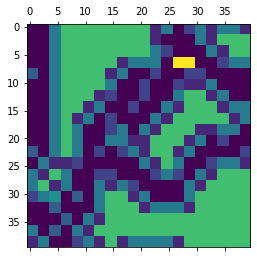

In [6]:
plt.matshow(data[-1,130:170,300:340])

In [7]:
radious = 1
neighborhood = helpers.moore([radious,radious])
data = getProblem(data[:,130:170,300:340],neighborhood,1,-1)

123

4

5
6
78

9
10
1112

13
14
1516

17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
4344

45
46
47
48
49
50
51
52
53
54
55
5657

58
59
6061

62
63
64
6566

67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
8384

85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115116

117
118
119120

121
122
123124

125
126
127
128
129
130
131132

133
134
135
136
137
138
139
140141

142
143
144
145
146
147
148
149
150
151
152153

154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194195

196
197
198
199
200201

202203

204
205
206
207
208
209
210
211
212
213
214
215
216
217
218219

220
221
222223

224
225
226
227
228
229
230
231
232
233
234
235
236237

238
239
240
241
242
243244

245
246
247248

249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264265

266
267
268269

270
271
272
273
274
275
276277



In [8]:
data=np.array(data)
values = {}
count = 0
for row in data:
    for j,col in enumerate(row):
        if col not in values:
            count += 1
            values[col] = count
        row[j] = values[col]

In [10]:
model = GGA(data,np.shape(data)[1]-1,path="saves/Experiment1",verbose=2,noChilds=10,noChromosomes=100)

start setup
23.14001154899597
(6426, 3)
23.148011445999146
23.226011514663696
23.26999592781067
12 goals
end setup


In [11]:
model.run()

config saved at saves/Experiment1/28_01_20_09_30_20/config.json
iteration 1
goal = 1
goal = 3
goal = 4
goal = 5
goal 4 elapsed time: 5.917999267578125
goal = 6
goal 3 elapsed time: 6.3919994831085205
goal = 7
goal 1 elapsed time: 6.802000045776367goal 5 elapsed time: 6.768000364303589

goal = 8goal = 9

goal 6 elapsed time: 6.752012729644775
goal = 10
goal 8 elapsed time: 6.336987018585205
goal = 11
goal 7 elapsed time: 7.0899999141693115
goal = 12
goal 9 elapsed time: 6.899983882904053
goal = 13
goal 11 elapsed time: 6.543025970458984
goal 10 elapsed time: 6.9870030879974365
goal 12 elapsed time: 6.4279944896698
goal 13 elapsed time: 6.432001352310181
{'generation': 1, 'elapsedTime': 20.353354692459106, 'fitness': {1: [0.008912196960533823, 0.023272770143806635, 0.19355057594311426], 3: [0.01567148354711643, 0.0074877967991382795, 0.3193764069052979], 4: [0.008001294423280876, 0.07781335548457413, 0.19846623877309952], 5: [-0.006139808452064114, 0.013603577140262845, 0.175522035628395

In [9]:
model = OCAT(data,np.shape(data)[1]-1)

problem
matrix
domain
binarized
bdomains
indexes
dindex
pos index
neg index
auxiliar
terms


In [ ]:
model.train()

training for value 1
4323
4312
4153
4141
4115
3505
3493
3471
2979
2976
2970
2959
2233
1850
1844
1838
1827
1826
1315
1301
1291
1288
1287
1285
1278
1276
1275
1265
1229
1202
1194
821
814
806
745
718
717
527
527
527
527
525
523
522
522
520
520
520
517
517
512
512
510
510
510
510
510
509
509
509
507
507
506
506
506
505
505
505
505
505
505
505
502
502
502
502
501
495
495
490
490
490
490
490
489
488
485
485
485
485
485
485
485
485
484
484
484
484
484
484
484
484
481
478
478
478
478
475
475
474
474
474
471
471
467
467
467
467
467
466
464
464
463
463
463
462
462
462
462
462
462
462
462
462
462
difficult element 100/1000 to delete it
462
462
462
462
462
462
462
461
461
461
461
461
461
461
461
461
461
difficult element 100/1000 to delete it
461
461
461
459
459
459
458
458
458
458
458
458
458
458
458
458
difficult element 100/1000 to delete it
458
455
455
455
455
455
453
453
453
453
453
452
452
452
452
452
452
452
451
450
450
450
450
450
450
450
450
450
449
447
447
447
446
446
446
446
446
446
446


In [12]:
data.shape

(478400, 10)